In [2]:
import pandas as pd
import gzip
import numpy as np

#### Correlation Analysis for Audio Data
we plot the heat map of correlation matrix with audio data

In [49]:
with gzip.open('cleaned_data.zip','rb') as file:
    feature_data = pd.read_csv(file,index_col=[0,1])
audio_data = feature_data[feature_data.columns[feature_data.columns.str.startswith('audio_naive:')]]
# audio_data['uuid'] = audio_data.index.get_level_values('uuid')
uuid_audio = audio_data.groupby('uuid').count().index
audio_data_uuid = audio_data.loc[uuid_audio[36]]

audio_data_uuid -= np.mean(audio_data_uuid, axis=0)
audio_data_uuid /= np.std(audio_data_uuid, axis = 0)

audio_data_uuid.columns = [i[12:-5] for i in audio_data_uuid.columns]

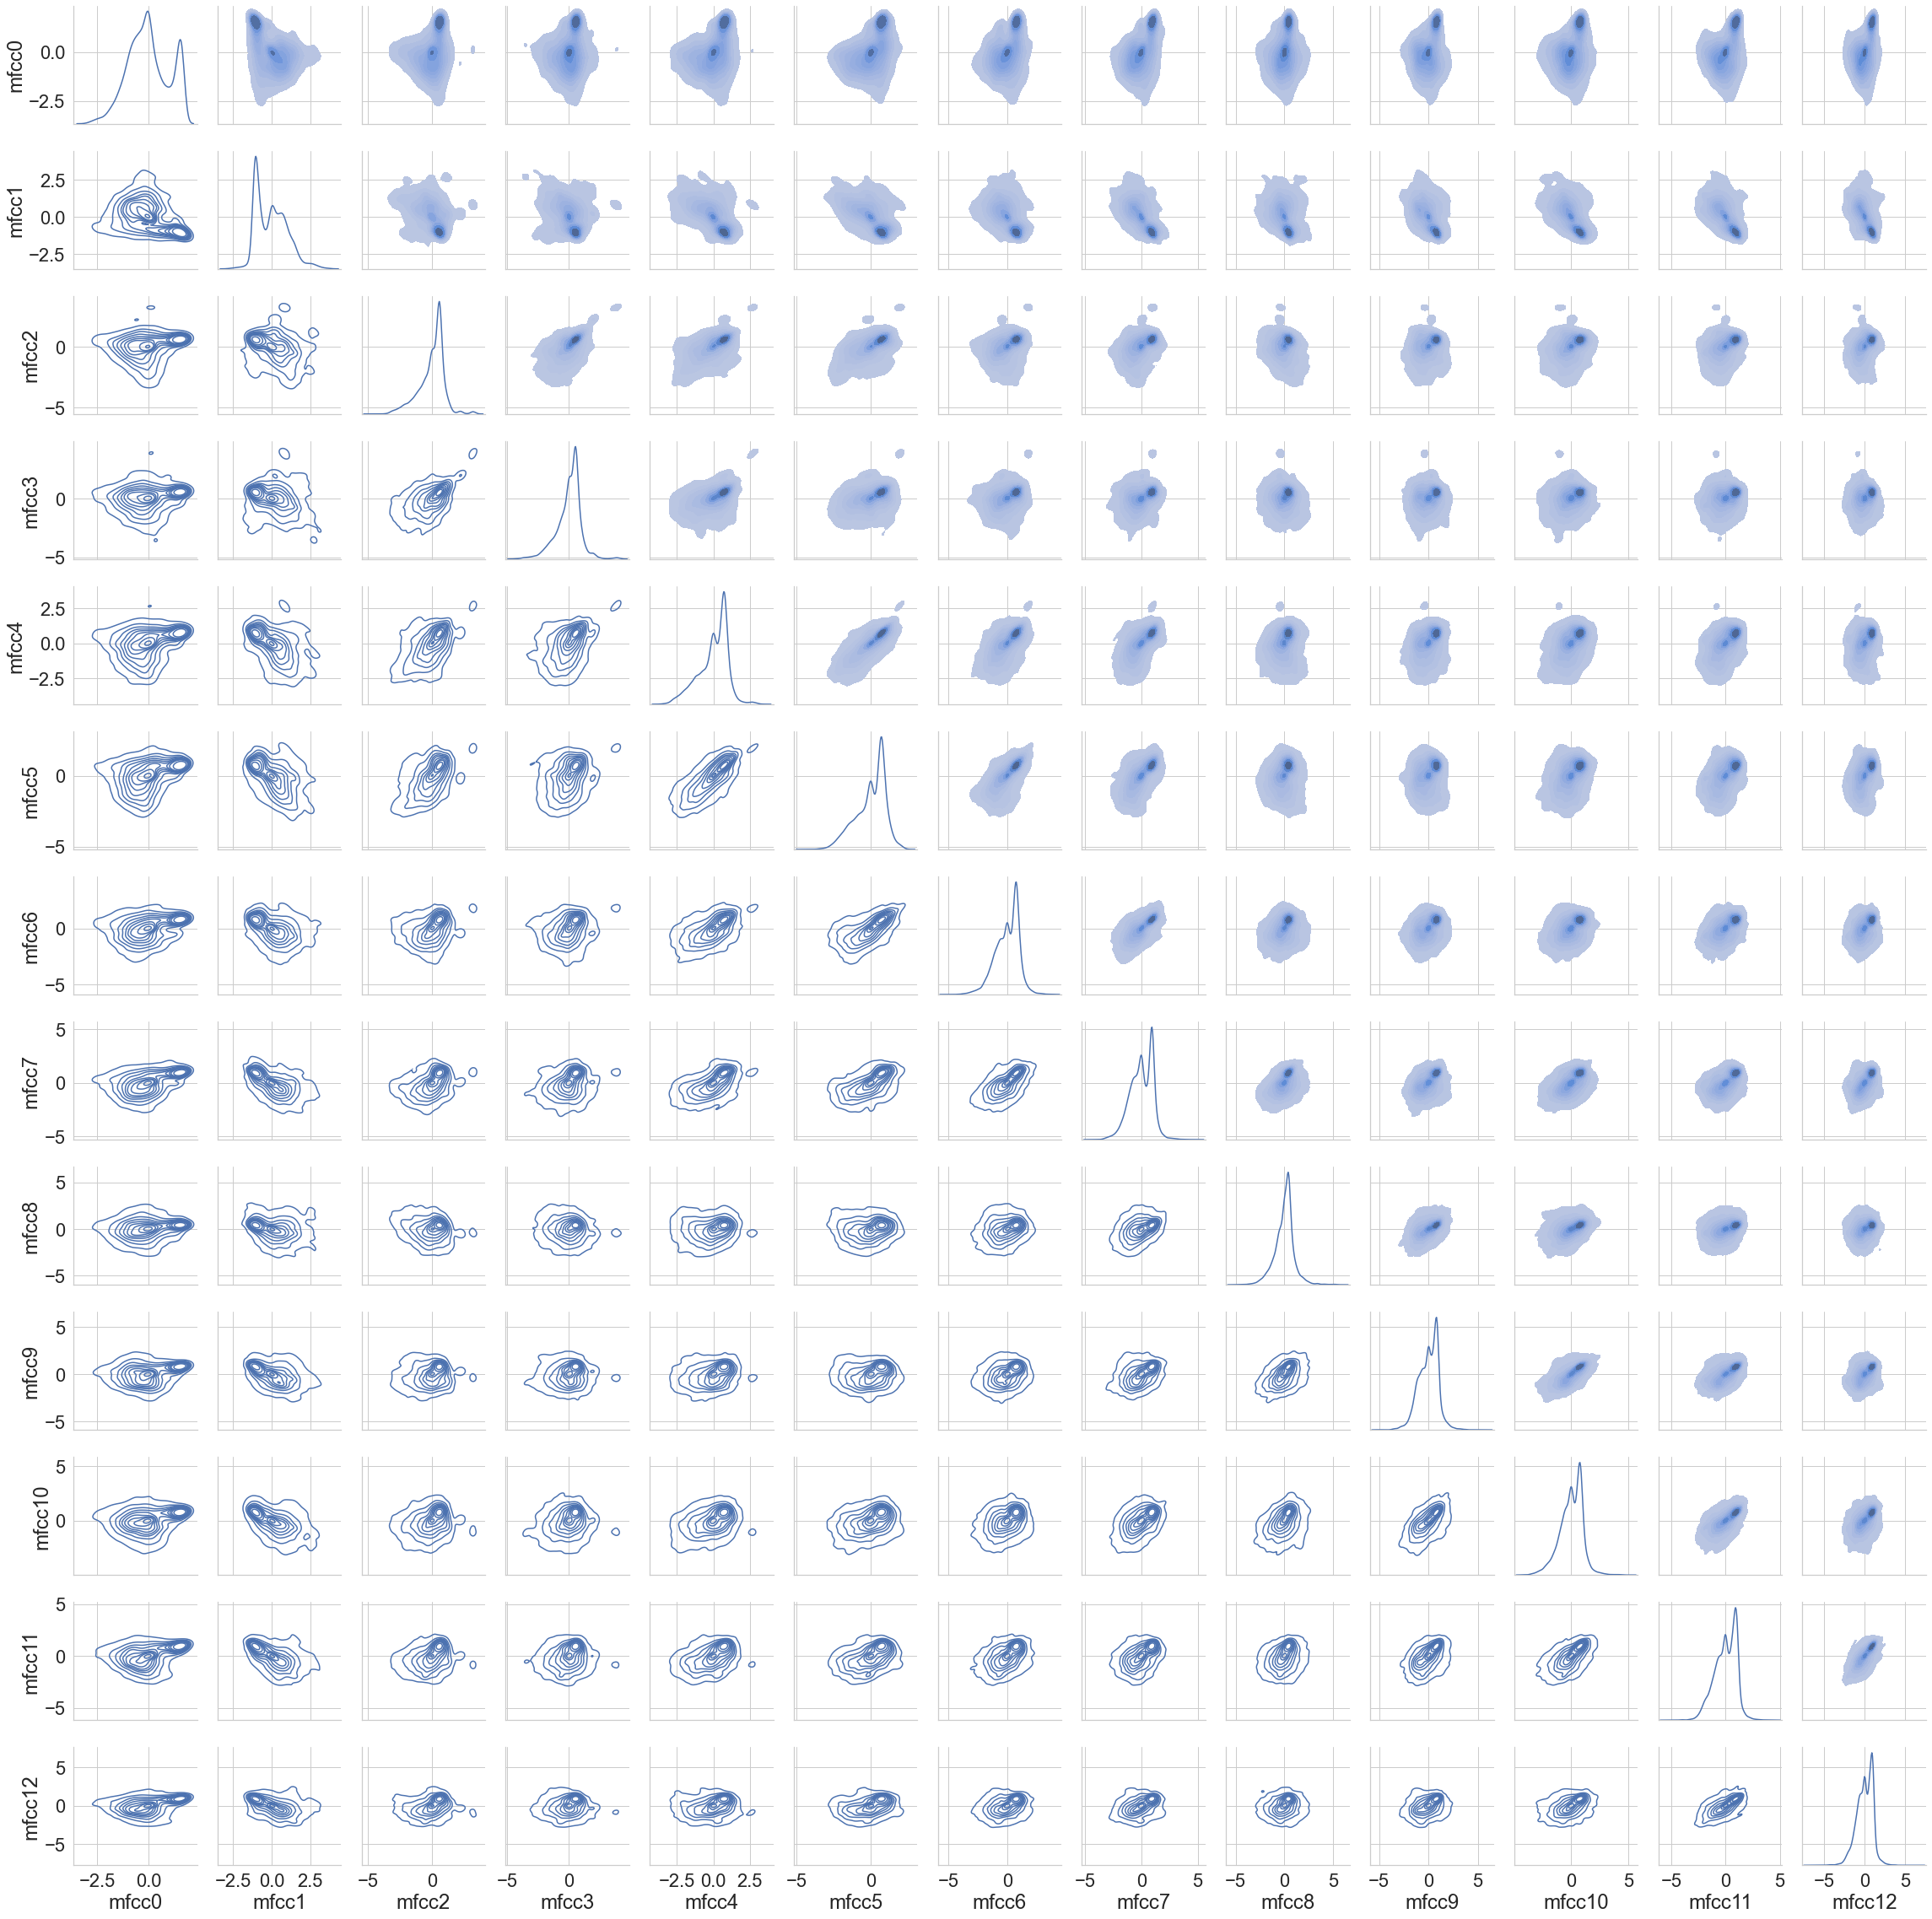

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid') 
g = sns.PairGrid(audio_data_uuid, diag_sharey=False)
g.map_upper(sns.kdeplot,fill = True, bw_adjust = 1)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot)

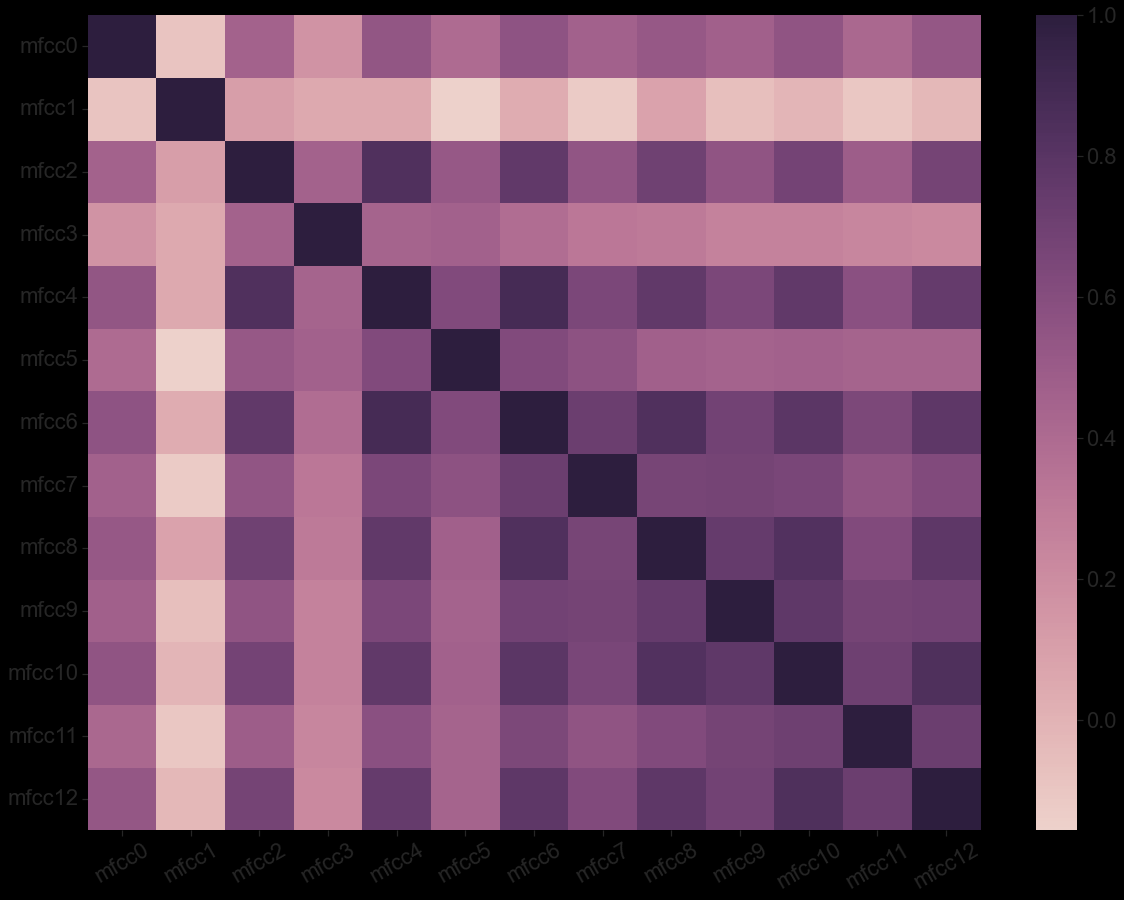

In [6]:
import seaborn as sns
# audio_data['uuid'] = audio_data.index.get_level_values('uuid')
uuid_audio = audio_data.groupby('uuid').count().index
audio_data_uuid = audio_data.loc[uuid_audio]
audio_data_uuid -= np.mean(audio_data_uuid, axis=0)
audio_data_uuid /= np.std(audio_data_uuid, axis = 0)
audio_data_uuid.columns = [i[12:-5] for i in audio_data_uuid.columns]
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
sns.set(context='notebook', style='ticks', font_scale=2,)
ax = sns.heatmap(audio_data_uuid.corr(), cmap=sns.cubehelix_palette(as_cmap=True))
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
# plt.xticks([])
plt.show()

#### PCA
This part is using principle component analysis to reduce the dimension of audio data

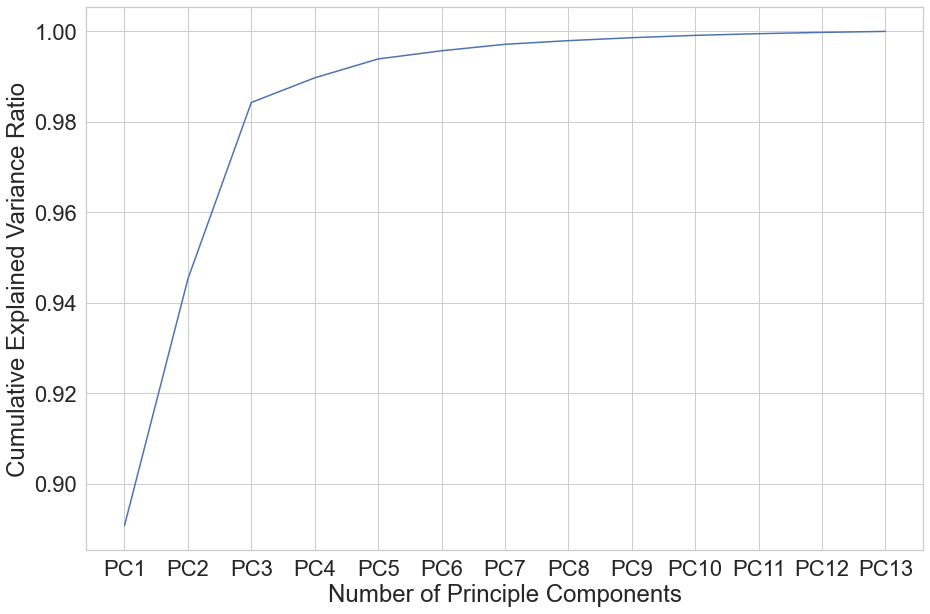

In [39]:
from sklearn.decomposition import PCA
def pca_to_data(csv_df,n):

    pca = PCA(n_components=n)
    features = csv_df.loc[:,csv_df.columns.str.startswith('audio_naive')]
    new_features = pca.fit_transform(features)
    pca_components = pca.components_
    eigenvalues = pca.explained_variance_ratio_

    print('PCA explained variance ratio is', pca.explained_variance_ratio_.sum())

    new_feature_df = pd.DataFrame(data=new_features,index=csv_df.index,columns=range(n))
    other_features = csv_df.loc[:,(csv_df.columns.str.startswith('audio_naive') == False)]
    new_feature_df = pd.concat([other_features,new_feature_df],axis=1,ignore_index=False)


    return (new_feature_df, pca_components,eigenvalues)

new_feature_df, pca_components,eigenvalues = pca_to_data(audio_data,13)
sns.set_style('whitegrid') 
plt.figure(figsize=(15,10))
g = sns.lineplot(np.cumsum(eigenvalues))
g.set_xticks(range(13))
g.set_xticklabels(['PC%s'% str(i+1) for i in range(13)])
plt.xlabel('Number of Principle Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()